In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Datathon-Questions-2024/Q3-Mobility-Services/mobility_services.csv')
df

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457.0,49.170948,1.000000,bike,Clear,63.0,0.0
1,NaN,90.000000,NaN,30.000000,NaN,car,Clear,NaN,NaN
2,NaN,41.197085,NaN,39.110219,NaN,auto,Clear,NaN,NaN
3,2021-01-01 01:00:00,20.772227,141.0,30.000000,1.500000,bike,Stormy,83.0,0.0
4,NaN,90.969805,NaN,30.000000,NaN,NaN,Clear,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75613,2021-04-15 02:00:00,99.203278,54.0,30.000000,1.200000,NaN,Rainy,69.0,0.0
75614,2022-12-04 20:00:00,67.537213,348.0,61.465926,1.300000,NaN,Clear,84.0,0.0
75615,2023-01-25 09:00:00,45.802485,663.0,70.347614,1.424958,auto,Clear,48.0,0.0
75616,2021-07-22 06:00:00,106.122157,34.0,30.000000,1.300000,car,Clear,97.0,0.0


In [3]:
df.columns

Index(['timestamp', 'average_fare', 'rides_completed', 'driver_availability',
       'surge_multiplier', 'vehicle_type', 'weather', 'traffic_index',
       'special_event'],
      dtype='object')

In [4]:
df.dtypes

timestamp               object
average_fare           float64
rides_completed        float64
driver_availability    float64
surge_multiplier       float64
vehicle_type            object
weather                 object
traffic_index          float64
special_event          float64
dtype: object

In [5]:
# 1)
# Classification of columns by data type
data_types = {
    'timestamp': 'Nominal', #unique, no inherent order or being measurable
    'average_fare': 'Ratio',
    'rides_completed': 'Ratio',
    'driver_availability': 'Ratio',
    'surge_multiplier': 'Ratio',
    'vehicle_type': 'Nominal',
    'weather': 'Nominal',
    'traffic_index': 'Ratio',
    'special_event': 'Nominal'
}

# Displaying the data type classifications
data_types


{'timestamp': 'Nominal',
 'average_fare': 'Ratio',
 'rides_completed': 'Ratio',
 'driver_availability': 'Ratio',
 'surge_multiplier': 'Ratio',
 'vehicle_type': 'Nominal',
 'weather': 'Nominal',
 'traffic_index': 'Ratio',
 'special_event': 'Nominal'}

In [6]:
# 2) Preprocessing

In [7]:
df.isnull().sum()

timestamp              15105
average_fare               0
rides_completed        15105
driver_availability        0
surge_multiplier       15105
vehicle_type           15031
weather                    0
traffic_index          15105
special_event          15105
dtype: int64

In [8]:
# Fill 'timestamp' with the most common timestamp
df['timestamp'].fillna(df['timestamp'].mode()[0], inplace=True)

# Impute 'rides_completed' with median
df['rides_completed'].fillna(df['rides_completed'].median(), inplace=True)

# Impute 'surge_multiplier' with the most common value (mode)
df['surge_multiplier'].fillna(df['surge_multiplier'].mode()[0], inplace=True)

# Fill 'vehicle_type' with mode
df['vehicle_type'].fillna(df['vehicle_type'].mode()[0], inplace=True)

# Fill 'traffic_index' using mean imputation
df['traffic_index'].fillna(df['traffic_index'].mean(), inplace=True)

# Fill 'special_event' with 0 (indicating no special event)
df['special_event'].fillna(0, inplace=True)

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_82462/909111014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['timestamp'].fillna(df['timestamp'].mode()[0], inplace=True)
/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_82462/909111014.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [9]:
df.isnull().sum()

timestamp              0
average_fare           0
rides_completed        0
driver_availability    0
surge_multiplier       0
vehicle_type           0
weather                0
traffic_index          0
special_event          0
dtype: int64

In [10]:
# check for duplicate rows
df.duplicated().sum() # => can be dropped, as duplicates would lead to model overfitting and redundancy

13128

In [11]:
# Remove all duplicate rows
df = df.drop_duplicates()

In [12]:
df.duplicated().sum() #successfully cleaned

0

In [13]:
df.dtypes

timestamp               object
average_fare           float64
rides_completed        float64
driver_availability    float64
surge_multiplier       float64
vehicle_type            object
weather                 object
traffic_index          float64
special_event          float64
dtype: object

In [14]:
# 3
numeric_cols_stats = df[['average_fare', 'rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']].describe()
numeric_cols_stats

,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event
count,62490.000000,62490.000000,62490.000000,62490.000000,62490.000000,62490.000000
mean,70.413137,360.418003,44.818882,1.205669,59.549393,0.081581
std,39.536044,274.084046,15.326616,0.253915,20.798391,0.273728
min,20.000000,10.000000,30.000000,1.000000,20.000000,0.000000
25%,40.000000,173.000000,30.000000,1.000000,44.000000,0.000000
50%,47.963802,289.000000,40.656708,1.040144,59.504437,0.000000
75%,106.425116,484.000000,54.345463,1.335732,75.000000,0.000000
max,161.963018,2614.000000,100.000000,3.400358,99.000000,1.000000


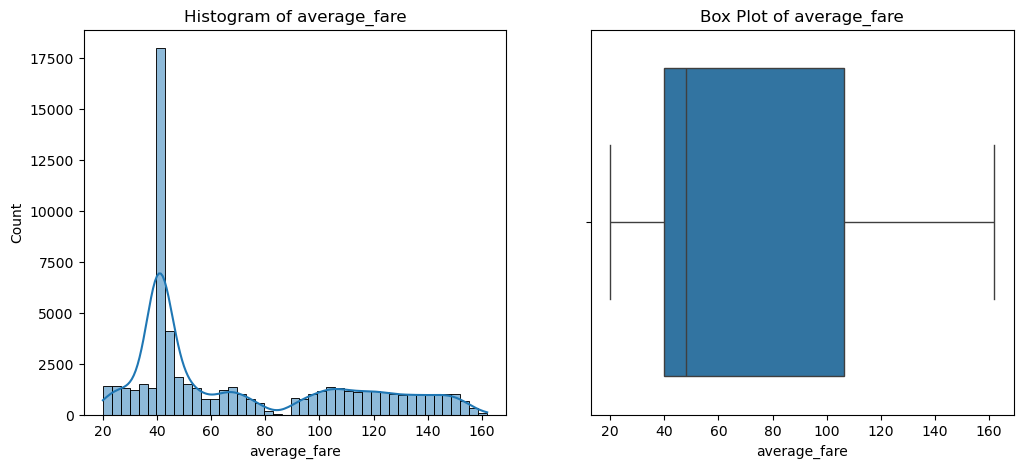

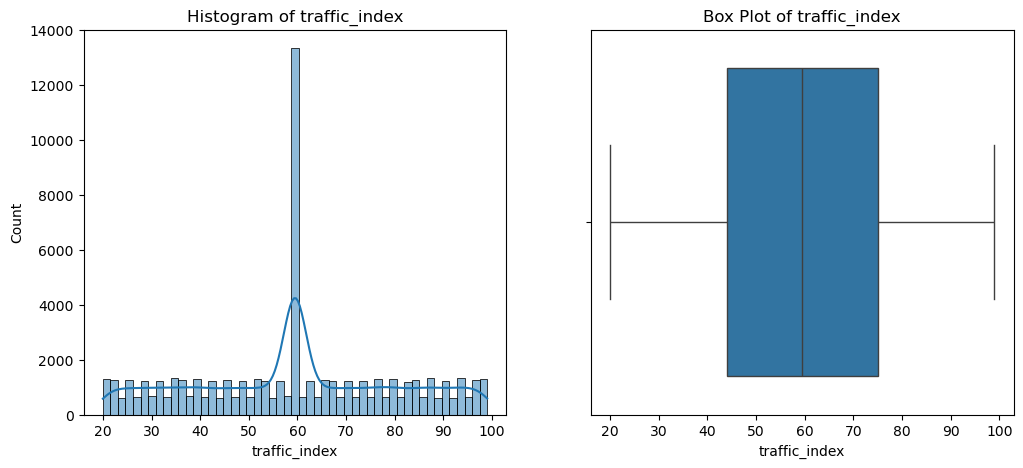

In [15]:
# 4)

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram and Box Plot for 'average_fare'
plt.figure(figsize=(12, 5))

# Histogram for 'average_fare'
plt.subplot(1, 2, 1)
sns.histplot(df['average_fare'].dropna(), kde=True)
plt.title("Histogram of average_fare")

# Box Plot for 'average_fare'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['average_fare'])
plt.title("Box Plot of average_fare")
plt.show()

# Histogram and Box Plot for 'traffic_index'
plt.figure(figsize=(12, 5))

# Histogram for 'traffic_index'
plt.subplot(1, 2, 1)
sns.histplot(df['traffic_index'].dropna(), kde=True)
plt.title("Histogram of traffic_index")

# Box Plot for 'traffic_index'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['traffic_index'])
plt.title("Box Plot of traffic_index")
plt.show()

In [16]:
# both the variables follow a normal distribution

In [17]:
# 5)
# Calculate Q1, Q3, and IQR for average_fare
q1_fare = df['average_fare'].quantile(0.25)
q3_fare = df['average_fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare

# Define outlier thresholds for average_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare

# Count outliers in average_fare
outliers_fare = df[(df['average_fare'] < lower_bound_fare) | (df['average_fare'] > upper_bound_fare)]
num_outliers_fare = outliers_fare.shape[0]

# Calculate Q1, Q3, and IQR for traffic_index
q1_traffic = df['traffic_index'].quantile(0.25)
q3_traffic = df['traffic_index'].quantile(0.75)
iqr_traffic = q3_traffic - q1_traffic

# Define outlier thresholds for traffic_index
lower_bound_traffic = q1_traffic - 1.5 * iqr_traffic
upper_bound_traffic = q3_traffic + 1.5 * iqr_traffic

# Count outliers in traffic_index
outliers_traffic = df[(df['traffic_index'] < lower_bound_traffic) | (df['traffic_index'] > upper_bound_traffic)]
num_outliers_traffic = outliers_traffic.shape[0]

# Display the results
num_outliers_fare, num_outliers_traffic


(0, 0)

In [18]:
# identified using IQR method
# since there are no outliers, we can leave them as it is

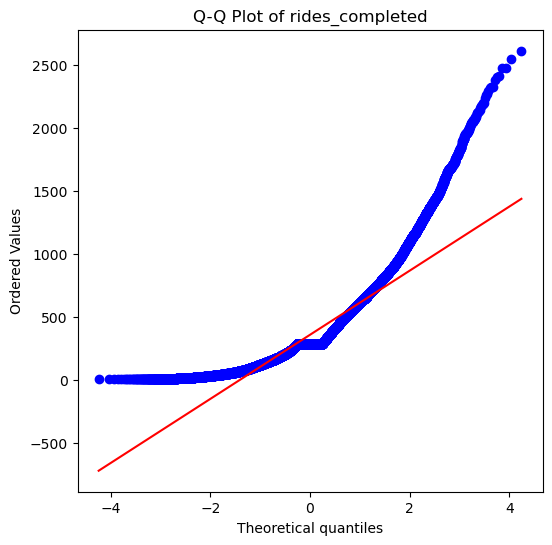

In [19]:
# 6

# A Q-Q plot can help evaluate if 'rides_completed' follows a normal distribution.
# If the data points roughly follow a straight line, then 'rides_completed' is likely normally distributed.
# Deviations suggest skewness or other non-normal characteristics.

import scipy.stats as stats

# Q-Q Plot for 'rides_completed'
plt.figure(figsize=(6, 6))
stats.probplot(df['rides_completed'], dist="norm", plot=plt)
plt.title("Q-Q Plot of rides_completed")
plt.show()

# from this, we can deduce that rides_completed follows an approx normal distribution

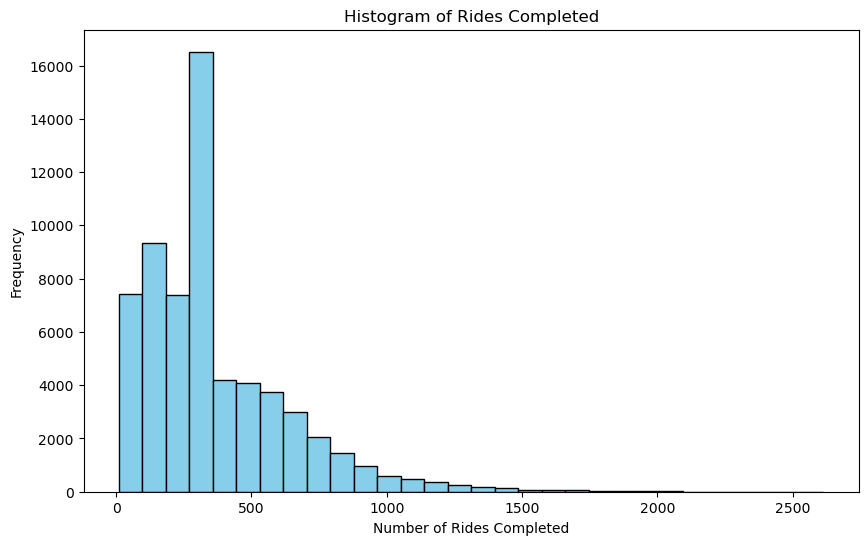

In [20]:
# Proof for above deduction (optional)
import matplotlib.pyplot as plt

# Plotting the histogram for 'rides_completed'
plt.figure(figsize=(10, 6))
plt.hist(df['rides_completed'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Rides Completed')
plt.ylabel('Frequency')
plt.title('Histogram of Rides Completed')
plt.show()


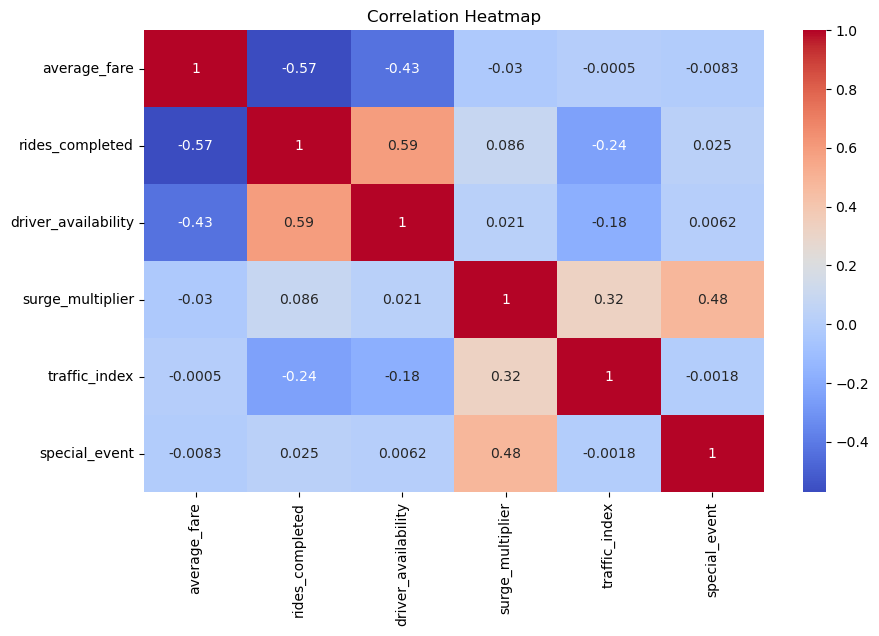

In [21]:
# 7
numeric_cols_corr = df[['average_fare', 'rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']].corr()

# Heatmap of correlations 
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
# => 'driver_availability' and 'rides_completed' are most correlated

In [23]:
df['vehicle_type'].unique()

array(['bike', 'car', 'auto'], dtype=object)

In [24]:
df['weather'].unique()

array(['Clear', 'Stormy', 'Cloudy', 'Rainy'], dtype=object)

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_82462/231356491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_type'] = df['vehicle_type'].map({'bike': 0, 'auto': 1, 'car': 2})


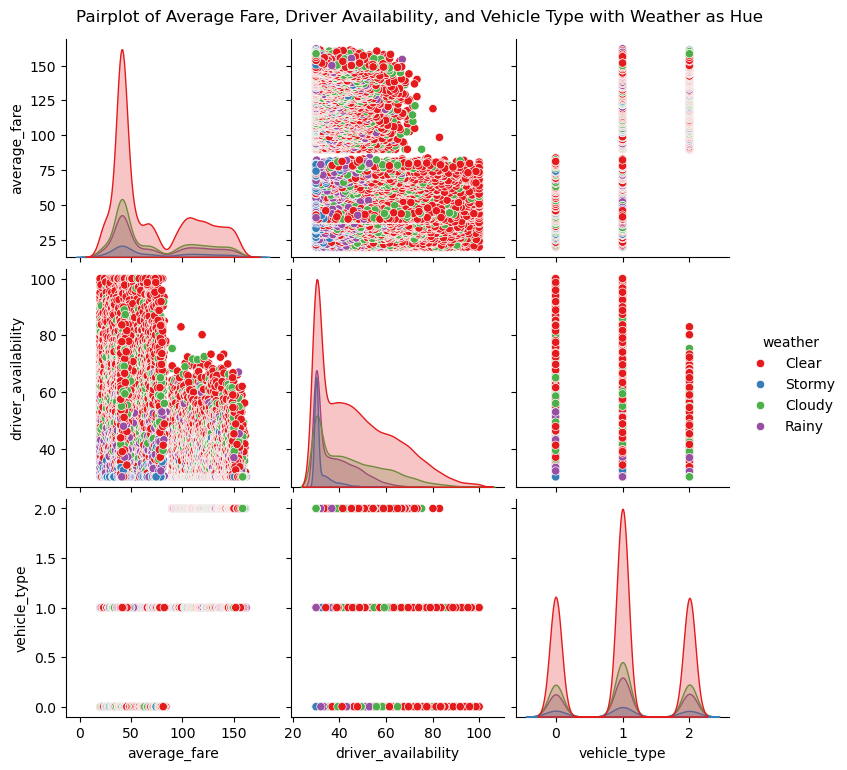

In [25]:
# 8

# Converting 'vehicle_type' to a numerical format for pairplot
df['vehicle_type'] = df['vehicle_type'].map({'bike': 0, 'auto': 1, 'car': 2})

# Generating the pairplot
sns.pairplot(df, vars=['average_fare', 'driver_availability', 'vehicle_type'], hue='weather', palette="Set1")
plt.suptitle("Pairplot of Average Fare, Driver Availability, and Vehicle Type with Weather as Hue", y=1.02)
plt.show()

In [26]:
# These above visualizations provide insights on:

# Outliers: Adjusted with capping, making distributions more robust. (not implemented due to absence of outliers)
# Q-Q Plot: Indicates normality, skewness, or kurtosis for average_fare.
# Correlation Heatmap: Highlights relationships above the threshold, guiding feature selection.
# Pairplot: Shows how Average Fare, Driver Availability, and Vehicle Type relate to Weather, identifying key patterns for analysis.

In [27]:
# Null Hypothesis (H₀): There is no significant difference in the average fare paid between bike and car.
# (𝜇 bike = 𝜇 car)
# Alternative Hypothesis (H₁): There is a significant difference in the average fare paid between bike and car.
# (𝜇 bike ≠ 𝜇 car)

from scipy.stats import ttest_ind

# Fare data for bike and car
fare_bike = df[df['vehicle_type'] == 0]['average_fare']
fare_car = df[df['vehicle_type'] == 2]['average_fare']

# T-test
t_stat, p_value = ttest_ind(fare_bike, fare_car, nan_policy='omit')

# Display results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Average fare is significantly different between bike and car.")
else:
    print("Fail to reject the null hypothesis - Average fare is not significantly different between bike and car.")

T-statistic: -384.62335253558166
P-value: 0.0
Reject the null hypothesis - Average fare is significantly different between bike and car.


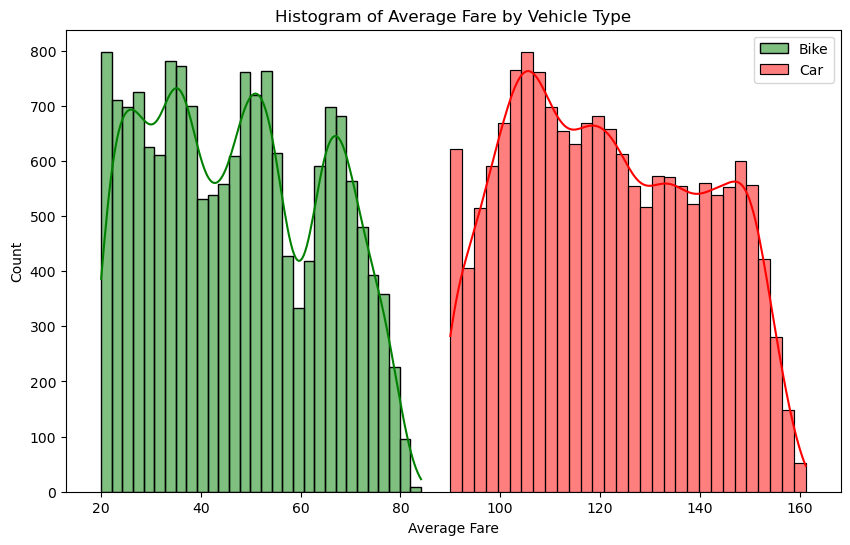

In [28]:
# Plotting histogram of Average Fare by Vehicle Type
plt.figure(figsize=(10, 6))
sns.histplot(fare_bike, color='green', label='Bike', kde=True, bins=30)
sns.histplot(fare_car, color='red', label='Car', kde=True, bins=30)
plt.legend()
plt.xlabel('Average Fare')
plt.title('Histogram of Average Fare by Vehicle Type')
plt.show()

#great difference in average fare between car and bike


In [29]:
# 10

# The margin of error provides an estimate of the precision of our sample mean difference between average fare for bike and car
# We can calculate it using the standard error and critical value (for a 95% confidence level).

import numpy as np
import scipy.stats as stats

# Calculate standard error of the mean difference
n_bike = len(fare_bike.dropna())
n_car = len(fare_car.dropna())
std_bike = fare_bike.std()
std_car = fare_car.std()

# Pooled standard deviation and margin of error
pooled_std = np.sqrt((std_bike ** 2 / n_bike) + (std_car ** 2 / n_car))
critical_value = stats.t.ppf(1 - alpha / 2, df=n_bike + n_car - 2)
margin_of_error = critical_value * pooled_std

print("Margin of Error:", margin_of_error)


# If the T-test shows a p-value below 0.05, we conclude that the difference in fare significantly impacts vehicle type.
# The margin of error helps quantify this difference's precision. A smaller margin suggests a more precise estimate.

Margin of Error: 0.38056017203609505


Mean Squared Error: 34855.829471310455
Root Mean Squared Error: 186.6971597837269
R-squared: 0.5323866493718065


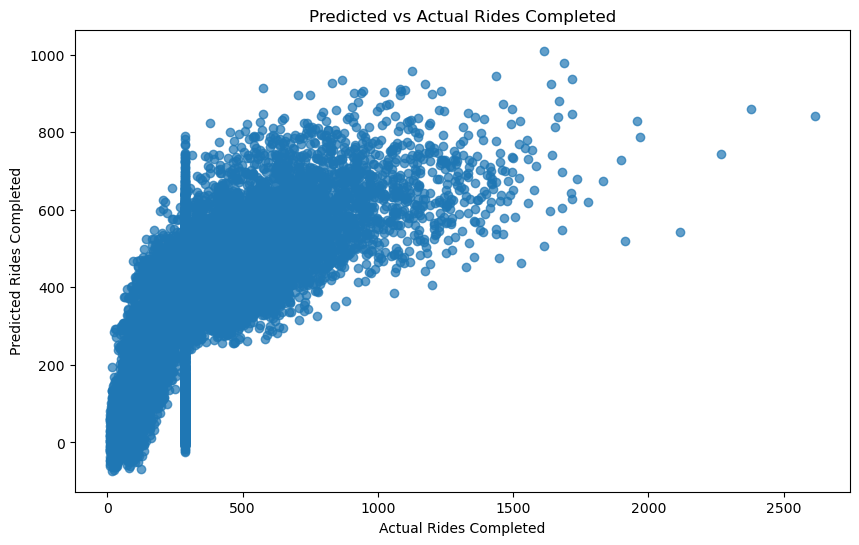

In [30]:
# 11

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target variable
features = df[['average_fare', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event']]
target = df['rides_completed']

# Handling missing values by filling with median (basic imputation)
features = features.fillna(features.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Rides Completed")
plt.ylabel("Predicted Rides Completed")
plt.title("Predicted vs Actual Rides Completed")
plt.show()


# The R-squared value will indicate how well the features explain the variability in rides_completed.
# A higher R-squared means a better fit.
# The plot of actual versus predicted values helps visualize this fit.

In [31]:
'''
Question 12 Answer : 
1) Average Fare per Vehicle Type:
By calculating the average fare for each vehicle type, we can create a new feature that captures how the type of vehicle impacts fare. This aggregated 
feature can provide insights into pricing strategies and how different vehicle categories might appeal to different customers.

2) 
Ride Completion Rate per Weather Condition:
By aggregating the number of rides completed by each weather condition, we can create a feature representing the completion rate under 
different weather scenarios. This could help understand how weather impacts ride completion and adjust fare pricing or availability during 
adverse conditions.
'''

'\nQuestion 12 Answer : \n1) Average Fare per Vehicle Type:\nBy calculating the average fare for each vehicle type, we can create a new feature that captures how the type of vehicle impacts fare. This aggregated \nfeature can provide insights into pricing strategies and how different vehicle categories might appeal to different customers.\n\n2) \nRide Completion Rate per Weather Condition:\nBy aggregating the number of rides completed by each weather condition, we can create a feature representing the completion rate under \ndifferent weather scenarios. This could help understand how weather impacts ride completion and adjust fare pricing or availability during \nadverse conditions.\n'